# **Forecasting USD-TRY Exchange Rates: Time Series Data Analysis and Preparation**



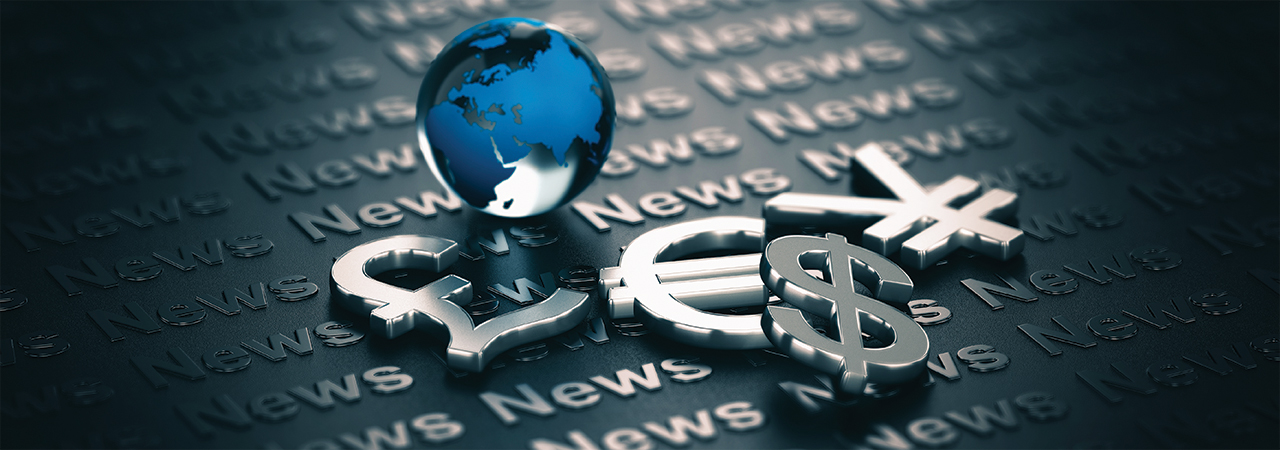

The project has been split into two distinct notebooks:

1.    **Forecasting USD-TRY Exchange Rates: Time Series Data Analysis and Preparation**: This notebook covers all aspects related to data analysis, initial exploration, and preprocessing, setting the foundation for predictive modeling.

2.    **Forecasting USD-TRY Exchange Rates: Time Series Predictive Modeling and Forecasting**: This notebook focuses on the predictive modeling and forecasting aspects, using the analysis and prepared data from the first part to drive the time series forecasting.

This structure should improve organization, readability, and clarity of the project. Let me know if you need any further refinements!

This project provides an in-depth analysis and prediction of the USD-TRY (U.S. Dollar to Turkish Lira) exchange rate, leveraging a combination of statistical tests, time series analysis, and predictive modeling techniques to uncover insights and forecast future trends. Given the complex and volatile nature of foreign exchange data, the analysis begins with data retrieval and an initial assessment, followed by data preprocessing to address missing values and ensure consistency.

The **Exploratory Data Analysis (EDA)** phase includes detailed visualizations to explore yearly and monthly price trends, moving averages, price differences, and comparisons of high-low and close-open price ranges. Additionally, differencing techniques, **Autocorrelation (ACF)**, and **Partial Autocorrelation (PACF)** analyses are applied to assess time series patterns, providing a foundation for selecting the appropriate forecasting models.

Following EDA, various **diagnostic and statistical tests**, such as **Augmented Dickey-Fuller (ADF)** and **Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** for stationarity, **Kruskal-Wallis** for distributional differences, and the **Hodrick-Prescott (HP) Filter** for trend extraction, are employed to examine the data’s underlying properties and guide model selection.


### **Table of Contents:**

1.   Import Libraries and Retrieve Data
  * Initial Analysis
2.   Data Preprocessing
  - Dropping Unnecessary Columns
  - Parsing Date Timestamp
  - Creating Date Features
  - Adding Technical Indicators
  - Handling Missing Data
3.   Visualization
  * Yearly and Monthly Price Analysis
  * Moving Averages and Price Differences
  * High-Low and Close-Open Price Comparisons
  * Time Series Differencing, ACF, and PACF Analysis
  * STL Decomposition
4.   Data Diagnostics and Statistical Tests
  * Augmented Dickey-Fuller (ADF) Test
  * Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
  * Kruskal-Wallis Test
  * Hodrick-Prescott (HP) Filter
5. Save Preprocessed Data



# **1. Import Libraries and Retrieve Data**

In [ ]:
import yfinance as yf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import kruskal
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_original = yf.download('USDTRY=X', start='2020-01-01', end='2024-10-21', progress=False)

# Flatten MultiIndex columns to simplify the structure
if isinstance(df_original.columns, pd.MultiIndex):
    df_original.columns = ['_'.join(col).strip() for col in df_original.columns.values]

# Optional: Remove the ticker part (e.g., 'USDTRY=X') from column names
df_original.columns = [col.split('_')[0] for col in df_original.columns]

df = df_original.copy()
df = df.reset_index()
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-01 00:00:00+00:00,5.947800,5.947800,5.947800,5.946800,5.947800,0
1,2020-01-02 00:00:00+00:00,5.946300,5.946300,5.958400,5.943050,5.946200,0
2,2020-01-03 00:00:00+00:00,5.955700,5.955700,5.976800,5.952000,5.954500,0
3,2020-01-06 00:00:00+00:00,5.967960,5.967960,5.975900,5.963990,5.968060,0
4,2020-01-07 00:00:00+00:00,5.969000,5.969000,5.976280,5.950790,5.968900,0
...,...,...,...,...,...,...,...
1248,2024-10-14 00:00:00+00:00,34.276199,34.276199,34.296459,34.242199,34.276199,0
1249,2024-10-15 00:00:00+00:00,34.252151,34.252151,34.270340,34.187229,34.252151,0
1250,2024-10-16 00:00:00+00:00,34.194790,34.194790,34.245899,34.161301,34.194790,0
1251,2024-10-17 00:00:00+00:00,34.164600,34.164600,34.228401,34.099140,34.164600,0


### **1.1. Initial Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       1253 non-null   datetime64[ns, UTC]
 1   Adj Close  1253 non-null   float64            
 2   Close      1253 non-null   float64            
 3   High       1253 non-null   float64            
 4   Low        1253 non-null   float64            
 5   Open       1253 non-null   float64            
 6   Volume     1253 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 68.6 KB


In [ ]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.0
mean,17.114222,17.114222,17.198504,17.049894,17.113668,0.0
std,9.451348,9.451348,9.468148,9.438138,9.451912,0.0
min,5.855100,5.855100,5.877900,5.838300,5.855100,0.0
25%,8.090220,8.090220,8.127000,8.007800,8.080400,0.0
50%,16.348000,16.348000,16.427059,16.180000,16.348000,0.0
75%,26.850500,26.850500,26.956200,26.749241,26.850500,0.0
max,34.276199,34.276199,35.664001,34.251469,34.276199,0.0


* The data types in the DataFrame are correctly assigned, with the Date column as a datetime type, the price-related columns as float types, and the Volume column as an integer type, indicating that the data is well-structured for time series analysis.
* The **Volume** column will be dropped in the **Data Preprocessing** section because it contains only zero values and does not contribute any meaningful information to the analysis of the USD-TRY exchange rate
* Additionally, the timezone in the **Date** column will be removed in the data preprocessing section.

* Interpretation of describe() Summary:
  1.   **Price Range:**
    * The *Close, High, Low, and Open* columns show that the prices range from around 5.85 to 34.28. This indicates significant growth in the USD-TRY exchange rate over the observed period, which could highlight trends, such as long-term currency depreciation or inflation.
  2.   **Central Tendency and Spread:**
    - The mean value for prices (*Close, High, Low, Open*) is approximately 17.1, with a standard deviation of around 9.44, showing that while there’s a central tendency, there is substantial price volatility.
  The interquartile range (difference between the 25th and 75th percentiles) suggests that the exchange rate has experienced periods of rapid changes, and prices are not centered closely around the mean.
  3.   **Maximum Value Insights:**
    * The *High* column’s max value of 35.66 is slightly higher than the max of Close at 34.28, showing that intraday volatility has led to temporary spikes above the closing rates, which might be useful for identifying peaks or extreme fluctuations in the rate.

  This summary hints at a dynamic exchange rate with notable volatility, useful for understanding trends and setting the context for time series forecasting.

# **2. Data Preprocessing**

In the context of ARIMA and SARIMA modeling, certain preprocessing steps such as dropping unnecessary columns, parsing date timestamps, creating additional date features, and adding common technical indicators may not be required. This is because ARIMA models primarily rely on the historical values of the time series itself, focusing on autoregressive and moving average components to capture the underlying patterns.

Furthermore, the inclusion of additional features or technical indicators can introduce noise and complexity without necessarily improving the model's performance, as ARIMA and SARIMA are designed to operate effectively on the original time series data. Therefore, maintaining the simplicity of the dataset by focusing solely on relevant historical data can lead to more robust and interpretable forecasting results.

However, these preprocessing steps would be more appropriate for deep learning (DL) and machine learning (ML) based algorithms, which can benefit from additional features to enhance their predictive capabilities.

### **2.1. Data Cleaning and Preprocessing**

In [ ]:
df = df.drop(columns=['Volume'])

In [ ]:
df['Date'] = df['Date'].dt.tz_localize(None)

### **2.2. Date Features**

The **create_date_features** function adds a range of time-based attributes to a dataset that are derived from a given date column. These features provide granular insights into temporal patterns across different timeframes. For instance:

  * **Day-Level Features** identify specific details like the day within the month or year, the day of the week, and whether it’s a weekend or business day.
  * **Week-Level Features** capture the week of the year or month, helping highlight patterns across shorter periods.
  * **Month-Level Features** include indicators for the start and end of a month, the number of days in it, and divisions within the month, allowing for a closer look at month-specific trends.
  * **Quarter-Level and Year-Level Features** outline start and end periods for quarters and years, respectively, as well as the number of days left in each, providing a higher-level perspective.
  * **Seasonal Features** categorize each date by season, supporting seasonal pattern detection in time series data.

These features help uncover insights at multiple levels of time granularity, useful for trend analysis and forecasting.

In [ ]:
def create_date_features(df, date_column):
    # --- Day-Level Features ---
    df['day_of_month'] = df[date_column].dt.day
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['day_of_week'] = df[date_column].dt.dayofweek
    df["is_wknd"] = df[date_column].dt.dayofweek > 4
    df['is_business_day'] = df[date_column].dt.weekday < 5

    # --- Week-Level Features ---
    df['week_of_year'] = df[date_column].dt.isocalendar().week
    df['week_of_month'] = df[date_column].apply(lambda d: (d.day - 1) // 7 + 1)  # Week of the month

    # --- Month-Level Features ---
    df['month'] = df[date_column].dt.month
    df['is_month_start'] = df[date_column].dt.is_month_start.astype(int)
    df['is_month_end'] = df[date_column].dt.is_month_end.astype(int)
    df['days_in_month'] = df[date_column].dt.days_in_month
    df['half_of_month'] = np.where(df[date_column].dt.day <= 15, 1, 2)
    df['days_until_month_end'] = df[date_column].dt.days_in_month - df[date_column].dt.day

    # --- Quarter-Level Features ---
    df['quarter'] = df[date_column].dt.quarter
    df['is_quarter_start'] = df[date_column].dt.is_quarter_start.astype(int)
    df['is_quarter_end'] = df[date_column].dt.is_quarter_end.astype(int)

    # --- Year-Level Features ---
    df['year'] = df[date_column].dt.year
    df['is_year_start'] = df[date_column].dt.is_year_start.astype(int)
    df['is_year_end'] = df[date_column].dt.is_year_end.astype(int)
    df['days_until_year_end'] = 365 - df[date_column].dt.dayofyear

    # --- Seasonal Features ---
    # 0: Winter, 1: Spring, 2: Summer, 3: Fall
    df["season"] = np.where(df.month.isin([12, 1, 2]), 0, 1)
    df["season"] = np.where(df.month.isin([6, 7, 8]), 2, df["season"])
    df["season"] = pd.Series(np.where(df.month.isin([9, 10, 11]), 3, df["season"])).astype("int8")

    return df


create_date_features(df, 'Date')

,Date,Adj Close,Close,High,Low,Open,day_of_month,day_of_year,day_of_week,is_wknd,is_business_day,week_of_year,week_of_month,month,is_month_start,is_month_end,days_in_month,half_of_month,days_until_month_end,quarter,is_quarter_start,is_quarter_end,year,is_year_start,is_year_end,days_until_year_end,season
0,2020-01-01,5.947800,5.947800,5.947800,5.946800,5.947800,1,1,2,False,True,1,1,1,1,0,31,1,30,1,1,0,2020,1,0,364,0
1,2020-01-02,5.946300,5.946300,5.958400,5.943050,5.946200,2,2,3,False,True,1,1,1,0,0,31,1,29,1,0,0,2020,0,0,363,0
2,2020-01-03,5.955700,5.955700,5.976800,5.952000,5.954500,3,3,4,False,True,1,1,1,0,0,31,1,28,1,0,0,2020,0,0,362,0
3,2020-01-06,5.967960,5.967960,5.975900,5.963990,5.968060,6,6,0,False,True,2,1,1,0,0,31,1,25,1,0,0,2020,0,0,359,0
4,2020-01-07,5.969000,5.969000,5.976280,5.950790,5.968900,7,7,1,False,True,2,1,1,0,0,31,1,24,1,0,0,2020,0,0,358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2024-10-14,34.276199,34.276199,34.296459,34.242199,34.276199,14,288,0,False,True,42,2,10,0,0,31,1,17,4,0,0,2024,0,0,77,3
1249,2024-10-15,34.252151,34.252151,34.270340,34.187229,34.252151,15,289,1,False,True,42,3,10,0,0,31,1,16,4,0,0,2024,0,0,76,3
1250,2024-10-16,34.194790,34.194790,34.245899,34.161301,34.194790,16,290,2,False,True,42,3,10,0,0,31,2,15,4,0,0,2024,0,0,75,3
1251,2024-10-17,34.164600,34.164600,34.228401,34.099140,34.164600,17,291,3,False,True,42,3,10,0,0,31,2,14,4,0,0,2024,0,0,74,3


### **2.3. Technical Indicator Feature Engineering**

This preprocessing block adds common technical indicators to a time series dataset. It includes:

  * **Moving Averages (Simple & Exponential)** to smooth out short-term price fluctuations.
  * **Volatility & Trend Indicators** like rolling standard deviation and MACD for trend signals.
  * **Lagged Features & Rate of Change** to capture past price behavior.
  * **Bollinger Bands** to identify overbought or oversold conditions.
  * **Momentum & Cumulative Returns** to track price direction and overall growth.

These features are useful for identifying patterns and enhancing predictive model performance.

In [ ]:
# Simple Moving Averages
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Exponential Moving Averages
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

# Rolling Standard Deviation
df['Rolling_STD_5'] = df['Close'].rolling(window=5).std()

# Lagged Features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_5'] = df['Close'].shift(5)

# Percentage Change
df['Pct_Change'] = df['Close'].pct_change()

# Cumulative Returns
df['Cumulative_Returns'] = (1 + df['Pct_Change']).cumprod() - 1

# Rate of Change
df['ROC_5'] = df['Close'].diff(5) / df['Close'].shift(5)

# Bollinger Bands
df['Bollinger_Upper'] = df['SMA_20'] + (df['Rolling_STD_5'] * 2)
df['Bollinger_Lower'] = df['SMA_20'] - (df['Rolling_STD_5'] * 2)

# MACD
df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Volume Features
# df['Volume_SMA_5'] = df['Volume'].rolling(window=5).mean()  # If 'Volume' column exists

# Momentum
df['Momentum'] = df['Close'] - df['Close'].shift(4)

After running the 'Technical Indicator Feature Engineering' code block, missing values appear in our feature calculations due to the rolling windows and shifting operations required for time-based metrics like moving averages (SMA, EMA), standard deviations, lagged features, and other indicators. For example, a 5-period simple moving average (SMA_5) will lack values for the first four rows, as it requires at least five data points. Similarly, lagged features and rate of change metrics (Lag_5, ROC_5) need prior data points, leading to NaNs at the start of each series. These initial NaN values are expected and reflect the minimum data required to compute each respective metric.

### **2.4. Handling Missing Data**

In [ ]:
def missing_value(dataframe, include_no_missing=True):
    missing_count = dataframe.isnull().sum()
    value_count = dataframe.shape[0]
    missing_percentage = round(missing_count / value_count * 100, 2)

    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})

    if not include_no_missing:
        missing_df = missing_df[missing_df['count'] > 0]

    missing_df = missing_df.sort_values(by='percentage', ascending=False)
    return missing_df

missing_value(df, False)

,count,percentage
SMA_50,49,3.91
SMA_20,19,1.52
Bollinger_Upper,19,1.52
Bollinger_Lower,19,1.52
Lag_5,5,0.40
ROC_5,5,0.40
SMA_5,4,0.32
Rolling_STD_5,4,0.32
Momentum,4,0.32
Lag_1,1,0.08


In [ ]:
# List of columns with small gaps to fill (1, 4, or 5 missing values)
small_gap_cols = ['SMA_5', 'Rolling_STD_5', 'Lag_1', 'Lag_5', 'Pct_Change', 'Cumulative_Returns', 'ROC_5', 'Momentum']

for col in small_gap_cols:
    df[col] = df[col].ffill().bfill()

In our dataset, some features (e.g., SMA_20, SMA_50, Bollinger_Upper, and Bollinger_Lower) are calculated using rolling windows, which creates missing values at the beginning of each series. To address this, we first define a dictionary, large_gap_cols, where each key is the column name, and each value is the respective window size for that feature.

For each column in large_gap_cols, we apply a two-step process:
* **Progressive Calculation for Initial Rows:** We fill the first window_size rows with progressively calculated averages. For instance, SMA_50 starts with an average based on 1 row, then 2 rows, and so on, up to 50 rows, ensuring these initial values reflect a gradual build-up rather than being abruptly filled.
* **Standard Rolling Mean for Remaining Rows:** For rows beyond the initial missing range, we apply the typical rolling mean (e.g., a 50-period rolling mean for SMA_50) to maintain consistency in calculations across the full dataset.

This approach fills initial missing values with meaningful averages, preserving trends without introducing sharp changes.

In [ ]:
# Dictionary to specify each column's respective window size
large_gap_cols = {
    'SMA_20': 20,
    'SMA_50': 50,
    'Bollinger_Upper': 50,
    'Bollinger_Lower': 50
}

# Apply progressively larger mean calculation for each specified window
for col, window_size in large_gap_cols.items():
    for i in range(window_size):
        df.loc[i, col] = df['Close'].iloc[:i + 1].mean()  # Incremental mean for initial rows

    # Apply rolling mean for remaining data beyond the window size
    df[col].iloc[window_size:] = df['Close'].rolling(window=window_size).mean().iloc[window_size:]

In [ ]:
df.isnull().sum().sum()

0

# **3. Visualization**

**Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):**

* **Purpose:** Assess the correlation of the time series with its own past values. ACF shows the correlation between observations at different lags, while PACF shows the correlation after removing the effects of shorter lags.
  - **ACF Plot:** Displays the correlation of the time series with its own past values over a range of lags. It helps identify if there are any repeating patterns or seasonal effects.
  - **PACF Plot:** Shows the correlation between the time series and its lags after removing the correlations of shorter lags. It is particularly useful for determining the order of the autoregressive (AR) component in an ARIMA model.
* **Usage:** Helps identify the order of ARIMA models and understand the underlying structure of the data.

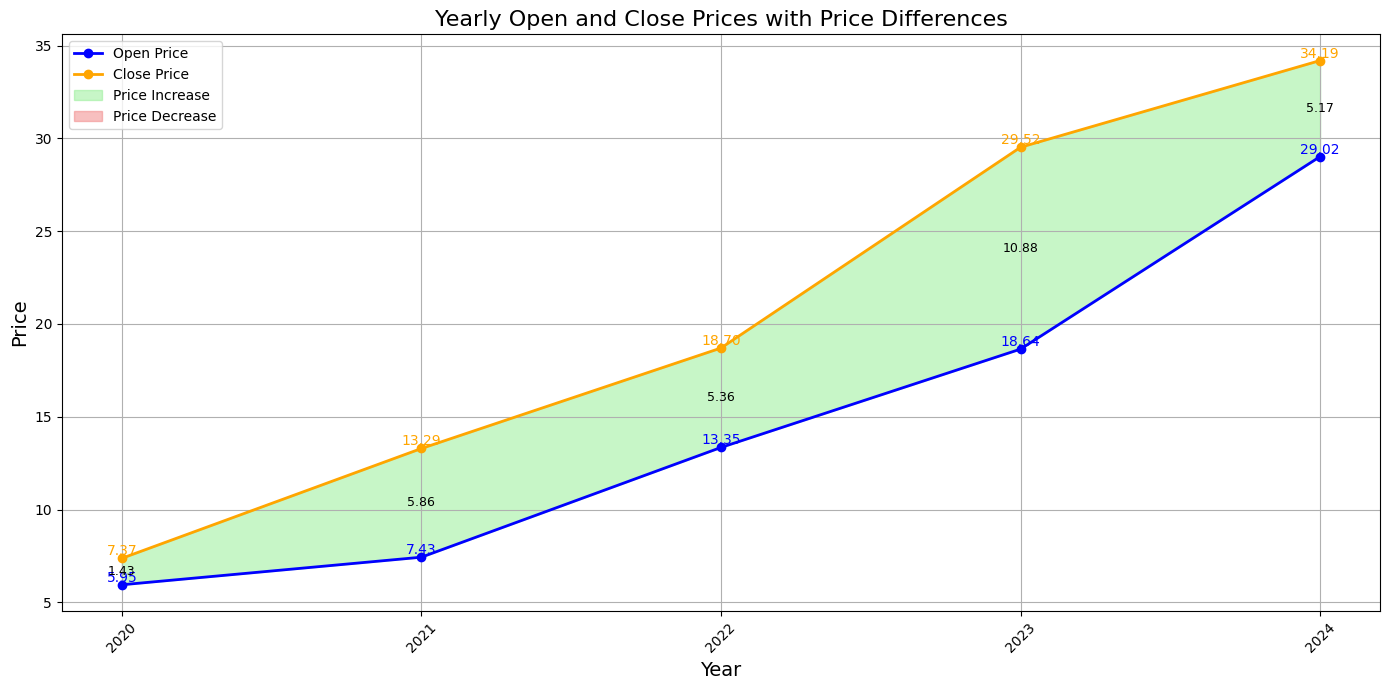

In [ ]:
plt.figure(figsize=(14, 7))

yearly_data = df.groupby('year').agg({
    'High': 'max',
    'Low': 'min',
    'Open': 'first',
    'Close': 'last'
}).reset_index()

plt.plot(yearly_data['year'], yearly_data['Open'], marker='o', label='Open Price', color='blue', linewidth=2)
plt.plot(yearly_data['year'], yearly_data['Close'], marker='o', label='Close Price', color='orange', linewidth=2)

price_difference = yearly_data['Close'] - yearly_data['Open']
plt.fill_between(yearly_data['year'], yearly_data['Open'], yearly_data['Close'],
                 where=(price_difference > 0), color='lightgreen', alpha=0.5, label='Price Increase')
plt.fill_between(yearly_data['year'], yearly_data['Open'], yearly_data['Close'],
                 where=(price_difference <= 0), color='lightcoral', alpha=0.5, label='Price Decrease')

for index, row in yearly_data.iterrows():
    plt.text(row['year'], row['Open'], f"{row['Open']:.2f}", color='blue', ha='center', va='bottom')
    plt.text(row['year'], row['Close'], f"{row['Close']:.2f}", color='orange', ha='center', va='bottom')

for index, row in yearly_data.iterrows():
    plt.text(row['year'], (row['Open'] + row['Close']) / 2,
             f"{price_difference[index]:.2f}",
             color='black', ha='center', va='center', fontsize=9)

plt.title('Yearly Open and Close Prices with Price Differences', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(yearly_data['year'], rotation=45)
plt.grid(True)  # Add grid for better visibility
plt.legend()
plt.tight_layout()
plt.show()

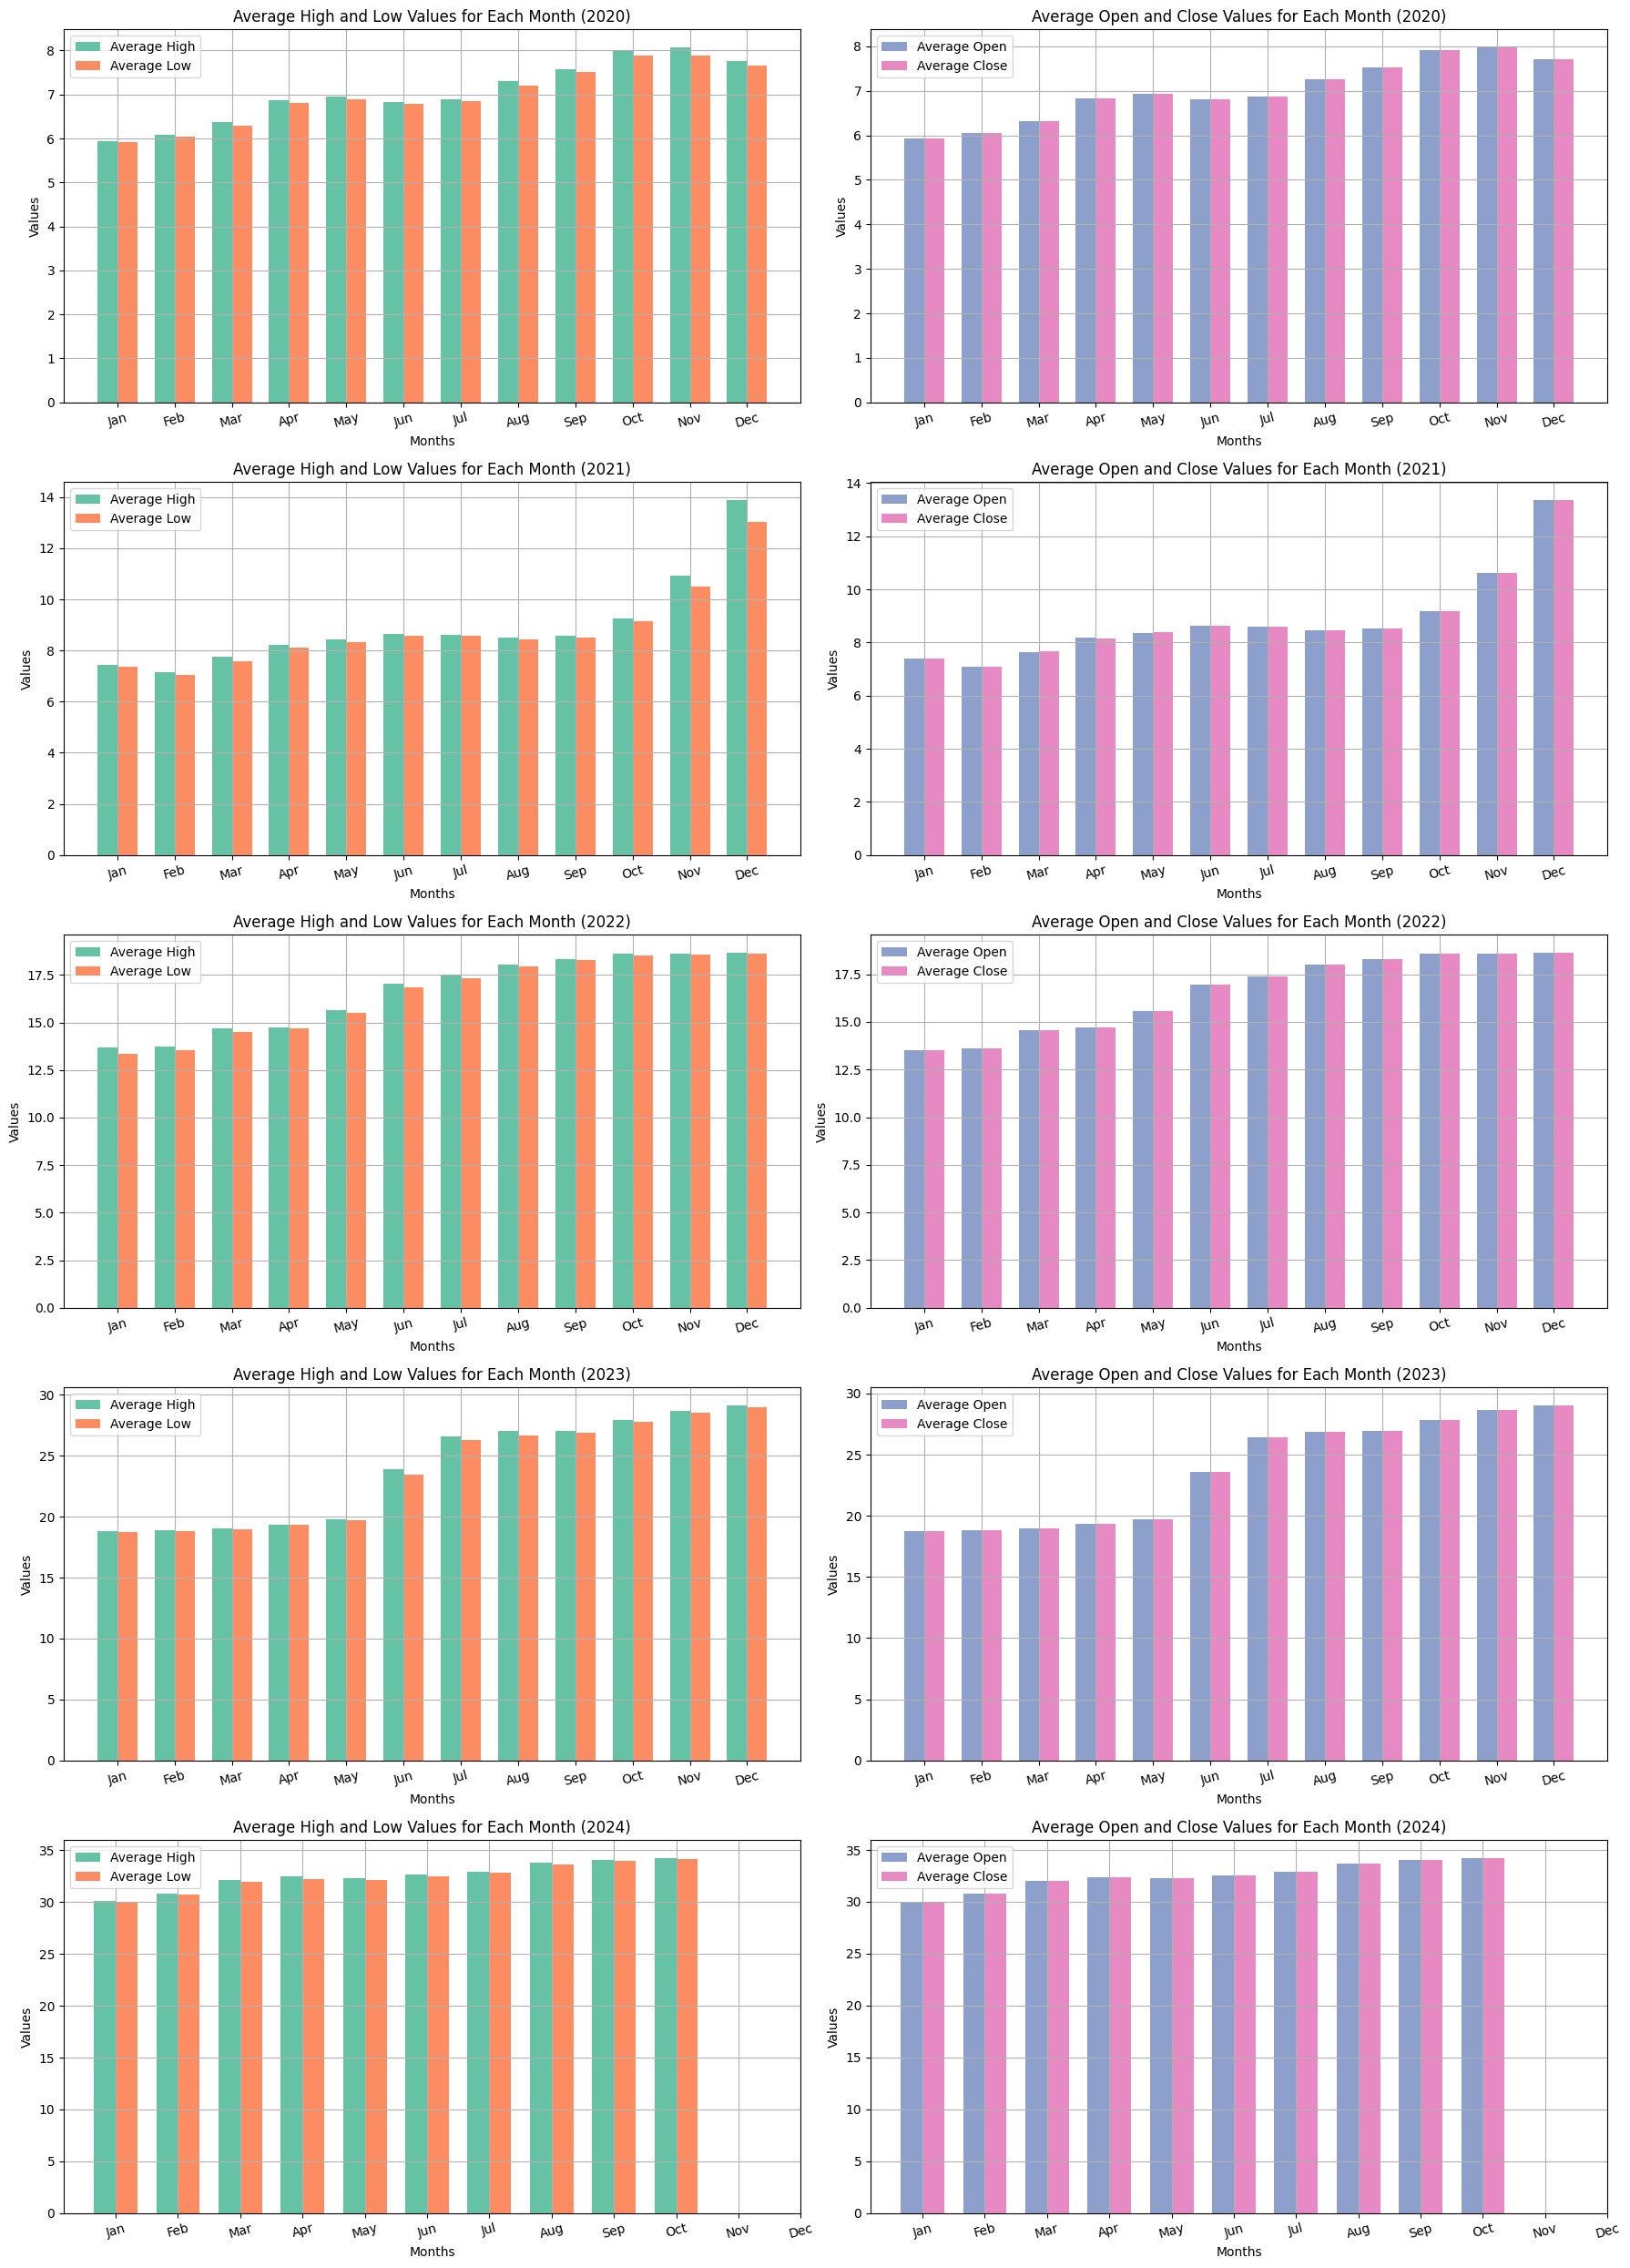

In [ ]:
years = df['year'].unique()

fig, axs = plt.subplots(nrows=len(years), ncols=2, figsize=(18, 5 * len(years)))

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i, year in enumerate(years):
    df_year = df[df['year'] == year]

    full_month_index = pd.Index(range(1, 13))

    high_values = df_year.groupby('month')['High'].mean().reindex(full_month_index)
    low_values = df_year.groupby('month')['Low'].mean().reindex(full_month_index)

    open_values = df_year.groupby('month')['Open'].mean().reindex(full_month_index)
    close_values = df_year.groupby('month')['Close'].mean().reindex(full_month_index)

    bar_width = 0.35

    axs[i, 0].bar(high_values.index - bar_width / 2, high_values, bar_width, label='Average High', color='#66c2a5')
    axs[i, 0].bar(low_values.index + bar_width / 2, low_values, bar_width, label='Average Low', color='#fc8d62')

    axs[i, 0].set_xlabel('Months')
    axs[i, 0].set_ylabel('Values')
    axs[i, 0].set_title(f'Average High and Low Values for Each Month ({year})')
    axs[i, 0].set_xticks(full_month_index)
    axs[i, 0].set_xticklabels(month_names, rotation=15)
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    axs[i, 1].bar(open_values.index - bar_width / 2, open_values, bar_width, label='Average Open', color='#8da0cb')
    axs[i, 1].bar(close_values.index + bar_width / 2, close_values, bar_width, label='Average Close', color='#e78ac3')

    axs[i, 1].set_xlabel('Months')
    axs[i, 1].set_ylabel('Values')
    axs[i, 1].set_title(f'Average Open and Close Values for Each Month ({year})')
    axs[i, 1].set_xticks(full_month_index)
    axs[i, 1].set_xticklabels(month_names, rotation=15)
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout()
plt.show()

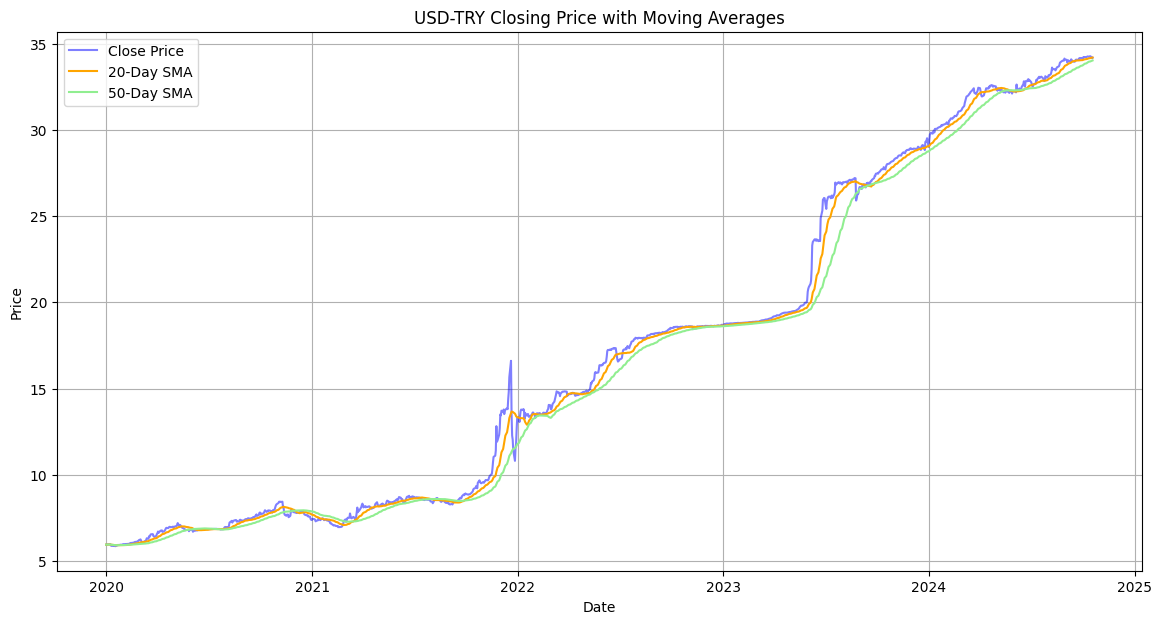

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['Date'], df['SMA_20'], label='20-Day SMA', color='orange')
plt.plot(df['Date'], df['SMA_50'], label='50-Day SMA', color='lightgreen')
plt.title('USD-TRY Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

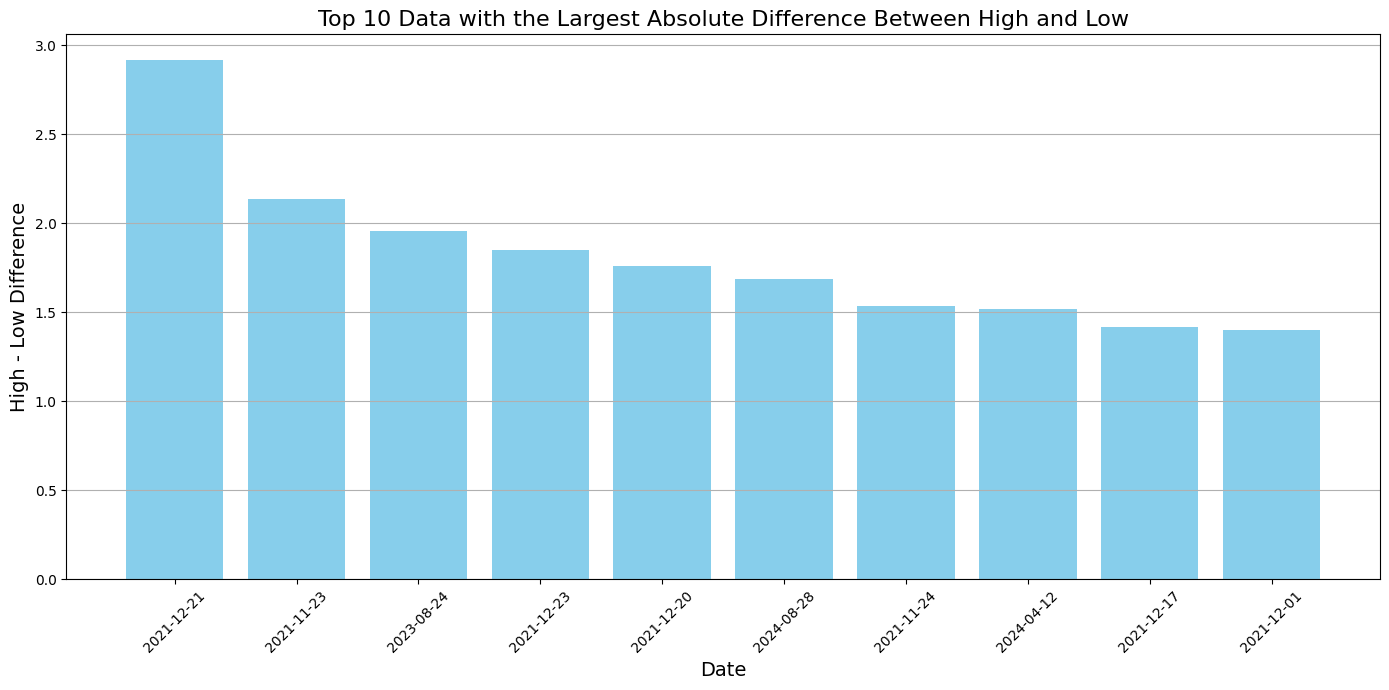

In [ ]:
df['High_Low_Difference'] = df['High'] - df['Low']

top_10_high_low = df.nlargest(10, 'High_Low_Difference')[['Date', 'High_Low_Difference']]
top_10_high_low['Date'] = pd.to_datetime(top_10_high_low['Date'])

plt.figure(figsize=(14, 7))
plt.bar(top_10_high_low['Date'].dt.strftime('%Y-%m-%d'), top_10_high_low['High_Low_Difference'], color='skyblue')
plt.title('Top 10 Data with the Largest Absolute Difference Between High and Low', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('High - Low Difference', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

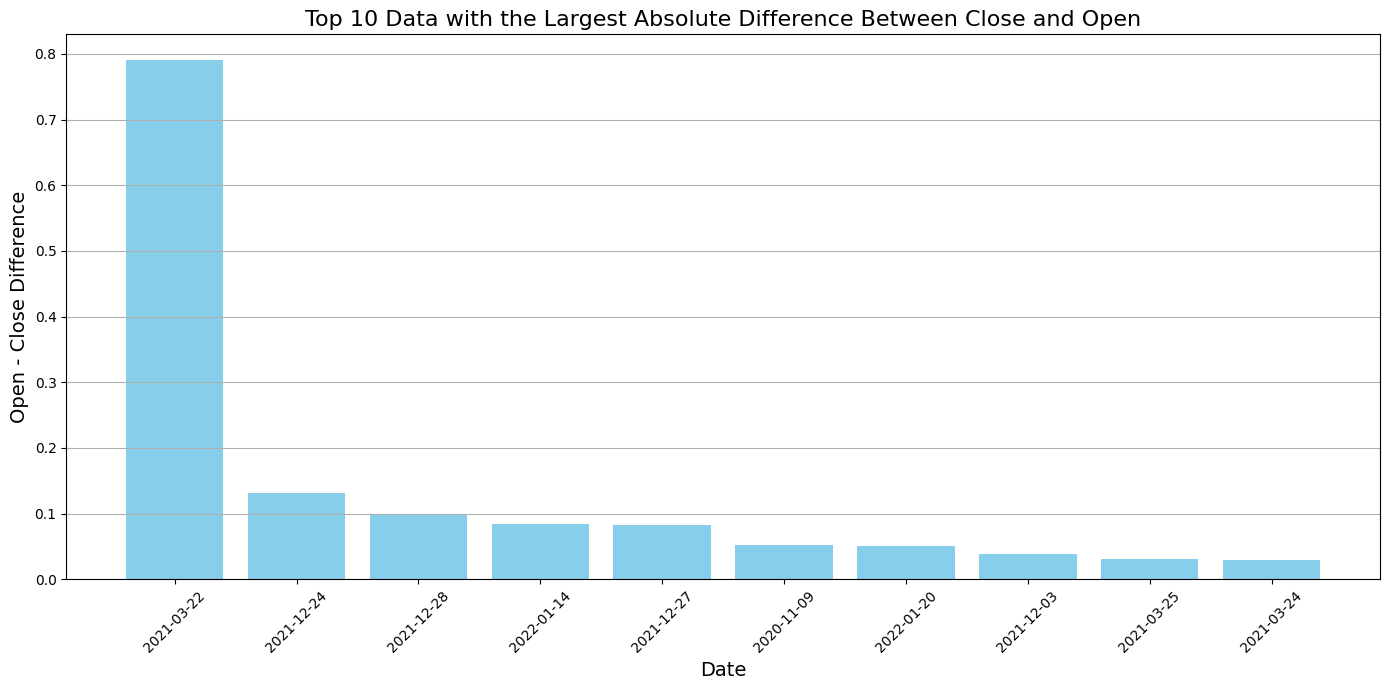

In [ ]:
df['Open_Close_Difference'] = df['Close'] - df['Open']

top_10_open_close = df.nlargest(10, 'Open_Close_Difference')[['Date', 'Open_Close_Difference']]
top_10_open_close['Date'] = pd.to_datetime(top_10_open_close['Date'])

plt.figure(figsize=(14, 7))
x = range(len(top_10_open_close))

plt.bar(x, top_10_open_close['Open_Close_Difference'], color='skyblue')
plt.title('Top 10 Data with the Largest Absolute Difference Between Close and Open', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Open - Close Difference', fontsize=14)
plt.xticks(x, top_10_open_close['Date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

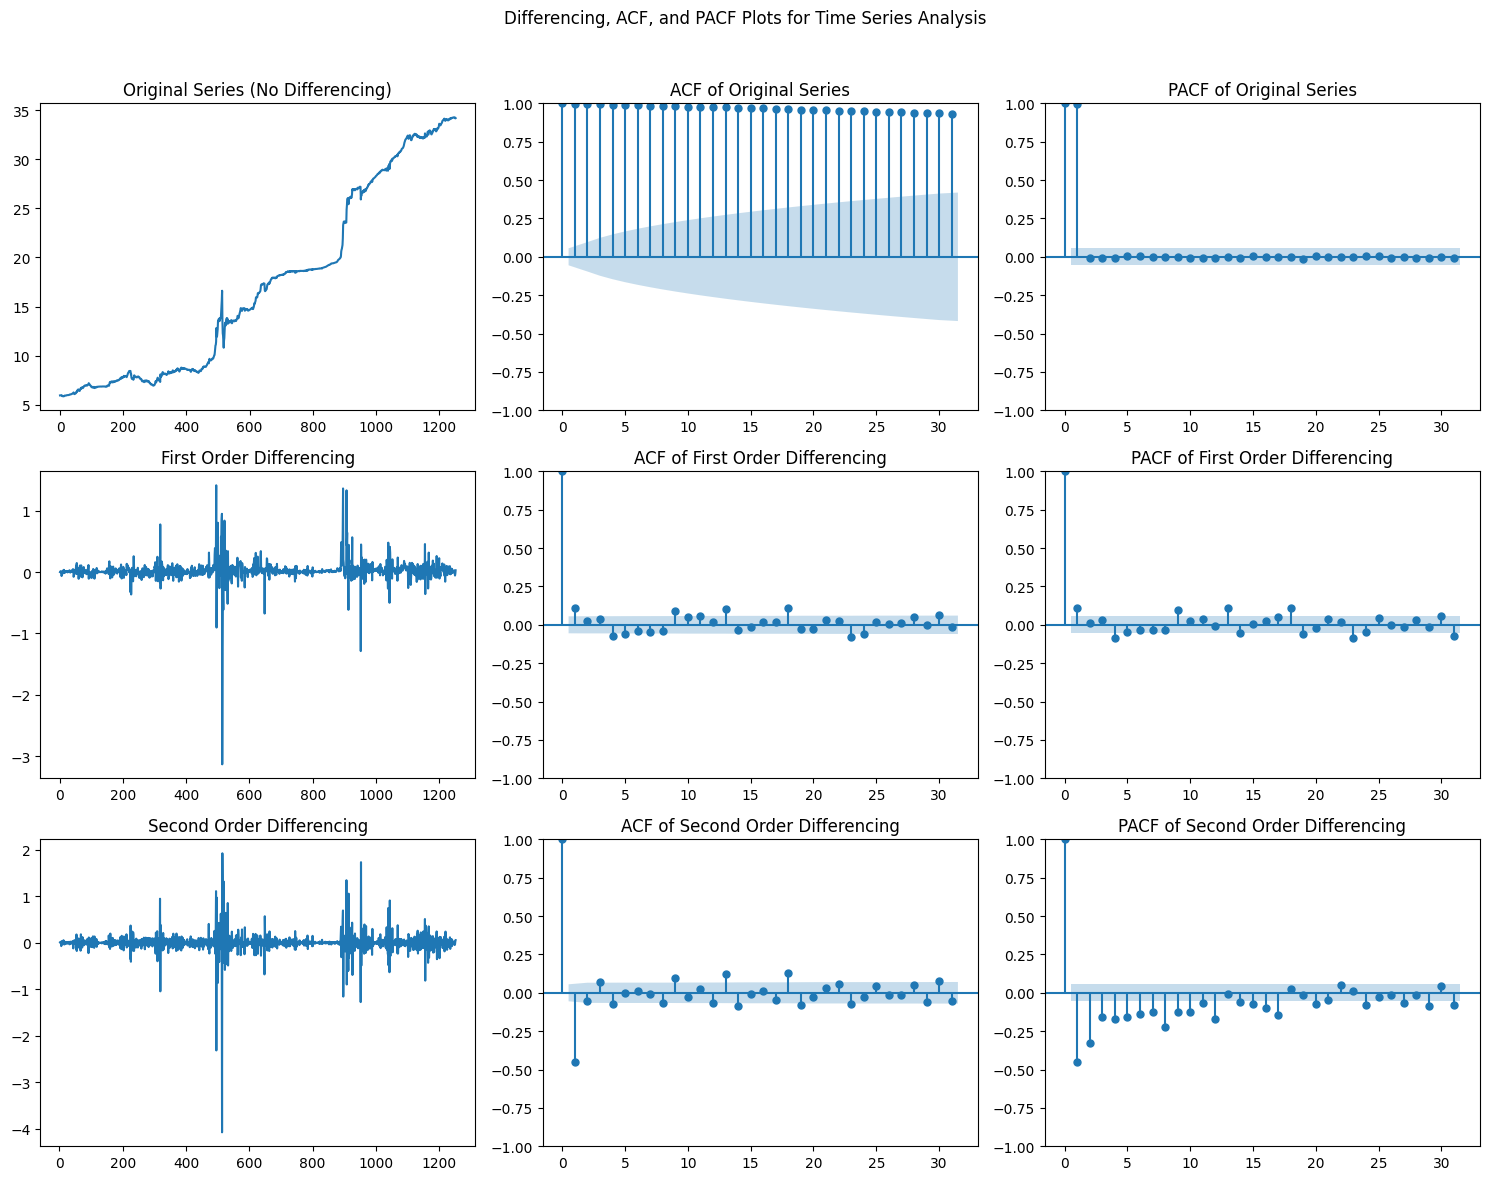

In [ ]:
data = df['Close']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Differencing, ACF, and PACF Plots for Time Series Analysis")

# No differencing
axes[0, 0].plot(data)
axes[0, 0].set_title("Original Series (No Differencing)")
plot_acf(data, ax=axes[0, 1])
axes[0, 1].set_title("ACF of Original Series")
plot_pacf(data, ax=axes[0, 2])
axes[0, 2].set_title("PACF of Original Series")

# First order differencing
data_diff1 = data.diff().dropna()
axes[1, 0].plot(data_diff1)
axes[1, 0].set_title("First Order Differencing")
plot_acf(data_diff1, ax=axes[1, 1])
axes[1, 1].set_title("ACF of First Order Differencing")
plot_pacf(data_diff1, ax=axes[1, 2])
axes[1, 2].set_title("PACF of First Order Differencing")

# Second order differencing
data_diff2 = data.diff().diff().dropna()
axes[2, 0].plot(data_diff2)
axes[2, 0].set_title("Second Order Differencing")
plot_acf(data_diff2, ax=axes[2, 1])
axes[2, 1].set_title("ACF of Second Order Differencing")
plot_pacf(data_diff2, ax=axes[2, 2])
axes[2, 2].set_title("PACF of Second Order Differencing")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**1.   Original Series (No Differencing):**
  - **Plot (Top Left):** The original series shows a clear upward trend, indicating non-stationarity. This trend suggests that differencing may be necessary to stabilize the mean and remove non-stationarity.
  - **ACF (Top Middle):** The ACF of the original series has high values that decay slowly, indicating strong autocorrelation across multiple lags. This is characteristic of non-stationary data with a trend.
  - **PACF (Top Right):** The PACF shows a significant spike at lag 1 followed by near-zero values, which often indicates the presence of a strong autoregressive component.

**2.    First Order Differencing:**
  - **Plot (Middle Left):** The series after first-order differencing appears to fluctuate around a constant mean, suggesting that the first differencing may have helped achieve stationarity.
  - **ACF (Middle Middle):** The ACF shows significantly reduced correlations compared to the original series. Most of the correlations fall within the confidence intervals, which suggests that the series may now be close to stationary.
  - **PACF (Middle Right):** The PACF also shows reduced spikes, with a small number of significant lags, which could be indicative of a potential AR component. The first order differencing may be sufficient for achieving stationarity.

**3. Second Order Differencing:**
  - **Plot (Bottom Left):** After second-order differencing, the series appears to be even more stable around a mean close to zero, possibly indicating over-differencing as the fluctuations are not significantly reduced from the first order.
  - **ACF (Bottom Middle):** The ACF remains largely within the confidence intervals with less structure, suggesting no strong autocorrelation remains, which can sometimes be an indicator of over-differencing.
  - **PACF (Bottom Right):** The PACF shows a random scatter of significant and insignificant lags without any clear structure, further suggesting over-differencing as the second differencing did not improve stationarity significantly.

#### **Summary**

* **Differencing Order**: The first-order differencing seems sufficient to make the series stationary, as indicated by the behavior of the ACF and PACF plots, with no strong pattern remaining after the first differencing.
* **Model Suggestion**: Given the significant spike at lag 1 in the first-order differenced PACF and minimal structure in the ACF, this could suggest an ARIMA model with **d=1.** The specific values for p and would need further refinement based on the specific criteria, but a low AR order (p=1) may be sufficient given the PACF spike.

In [ ]:
if isinstance(df.index, pd.DatetimeIndex):
    print("The 'Date' column is successfully set as the index and it is a DatetimeIndex.")
else:
    df.set_index('Date', inplace=True)
    print("The 'Date' column was not set as the index. It has now been set as the index.")

The 'Date' column was not set as the index. It has now been set as the index.


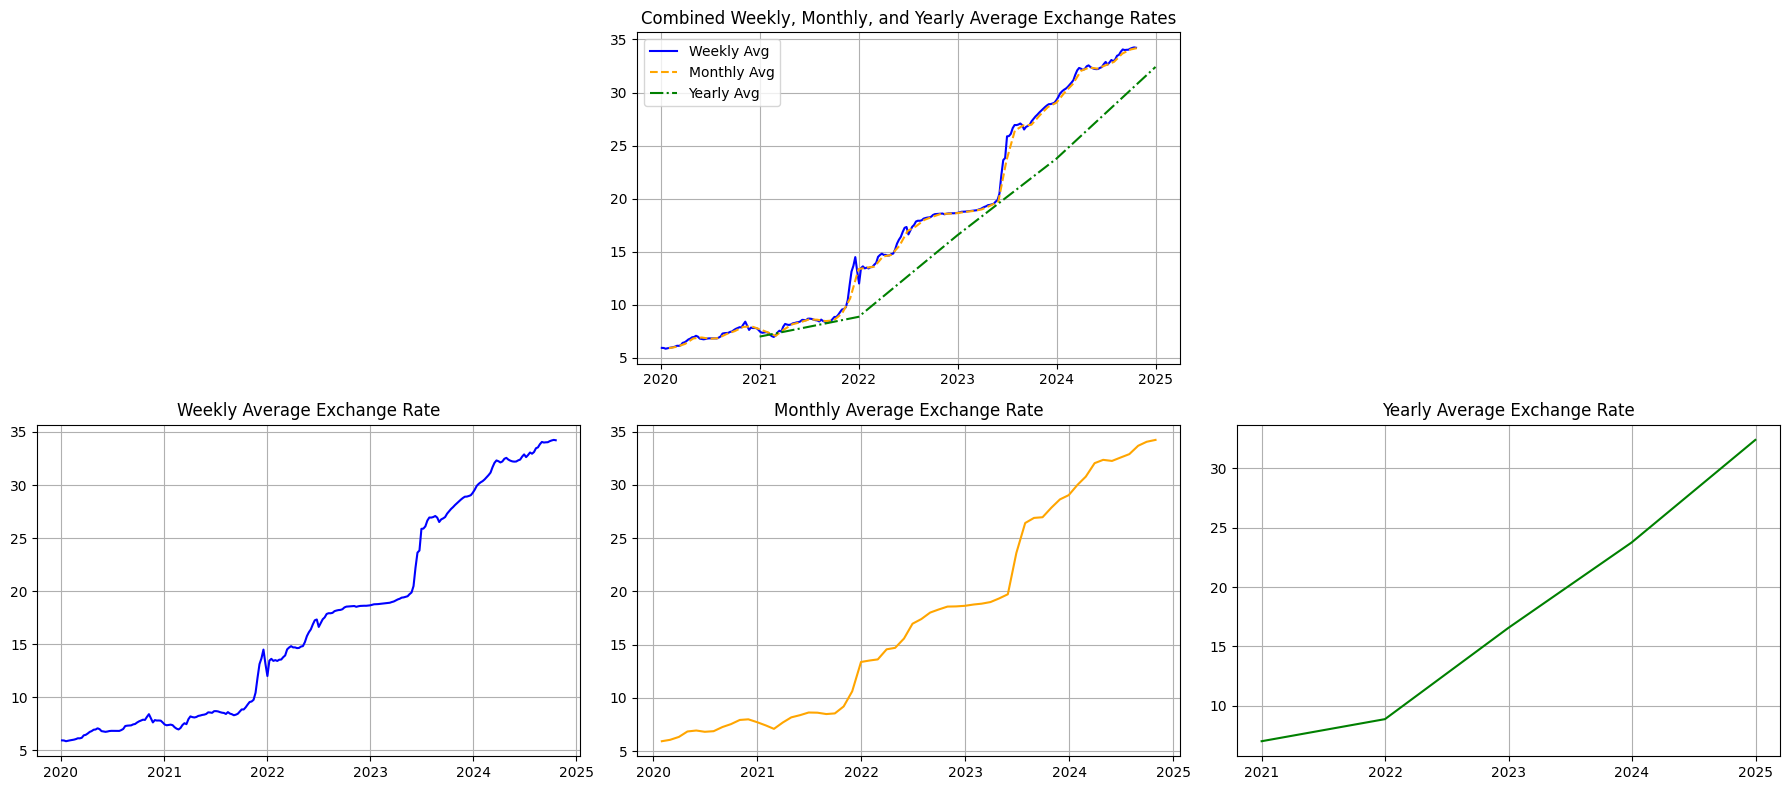

In [ ]:
# Assuming df['Close'] is the time series data
# Calculate weekly, monthly, and yearly averages
df_weekly = df['Close'].resample('W').mean()
df_monthly = df['Close'].resample('M').mean()
df_yearly = df['Close'].resample('Y').mean()

# Create the subplot layout
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# First Row: Combined plot
axes[0, 1].plot(df_weekly.index, df_weekly.values, label='Weekly Avg', color='blue', linestyle='-')
axes[0, 1].plot(df_monthly.index, df_monthly.values, label='Monthly Avg', color='orange', linestyle='--')
axes[0, 1].plot(df_yearly.index, df_yearly.values, label='Yearly Avg', color='green', linestyle='-.')
axes[0, 1].set_title("Combined Weekly, Monthly, and Yearly Average Exchange Rates")
axes[0, 1].legend()
axes[0, 1].grid()

# Second Row: Individual subplots
# Weekly Average
axes[1, 0].plot(df_weekly.index, df_weekly.values, color='blue')
axes[1, 0].set_title("Weekly Average Exchange Rate")
axes[1, 0].grid()

# Monthly Average
axes[1, 1].plot(df_monthly.index, df_monthly.values, color='orange')
axes[1, 1].set_title("Monthly Average Exchange Rate")
axes[1, 1].grid()

# Yearly Average
axes[1, 2].plot(df_yearly.index, df_yearly.values, color='green')
axes[1, 2].set_title("Yearly Average Exchange Rate")
axes[1, 2].grid()

# Format the x-axis to show only years
axes[1, 2].xaxis.set_major_locator(mdates.YearLocator())
axes[1, 2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

[fig.delaxes(ax) for ax in axes.flatten() if not ax.has_data()]
plt.tight_layout()
plt.show()

<Figure size 1800x800 with 0 Axes>

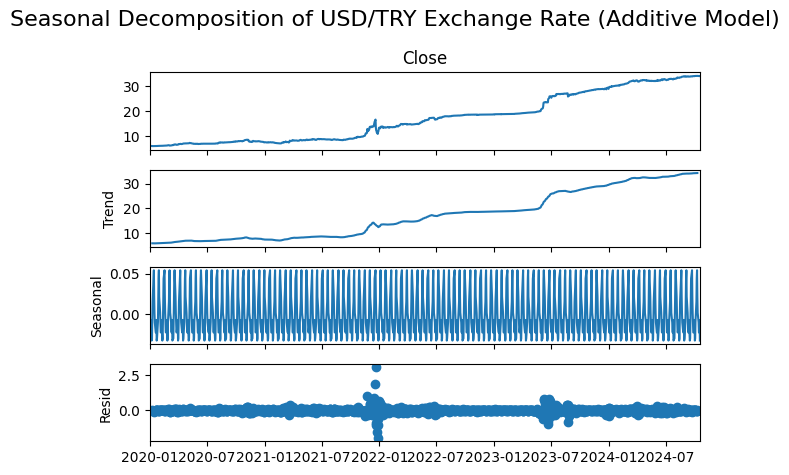

In [ ]:
stl_result = seasonal_decompose(df['Close'], model='additive', period=12)

plt.figure(figsize=(18, 8))
stl_result.plot()
plt.suptitle("Seasonal Decomposition of USD/TRY Exchange Rate (Additive Model)", fontsize=16)
plt.tight_layout()
plt.show()

* **Observed**: This is the original USD/TRY time series data. It shows a general upward trend, indicating that over time, the exchange rate has been increasing with some fluctuations along the way.

* **Trend**: This component isolates the underlying trend in the data, which is also upward. The upward movement in the trend component aligns with the observed data, confirming a long-term increase in the USD/TRY rate.

* **Seasonal**: The seasonal component reveals recurring patterns in the data. Here, the seasonal pattern is tightly packed and shows a consistent up-and-down oscillation. This suggests that there are regular fluctuations within each period (likely a daily or monthly cycle, depending on the period specified). The amplitude of the seasonal component appears to be relatively stable, showing no dramatic increases or decreases over time.

* **Residual**: This component represents the noise in the data, or the remaining variance that isn't explained by the trend or seasonal components. In this case, we see some large residual spikes around the middle part of the series. This could indicate sudden, unexpected changes in the exchange rate that were not captured by the trend or seasonal components, possibly due to external factors or market events.

The decomposition shows that the USD/TRY exchange rate is primarily driven by an upward trend, with a consistent seasonal cycle and occasional significant residual variations. This analysis supports the use of a seasonal model like SARIMA, as it suggests strong seasonality along with a clear trend.

# **4. Data Diagnostics and Statistical Tests**

* **For Stationarity Testing:** Use both the ADF and KPSS tests together. They provide complementary insights, as one tests for non-stationarity (ADF) and the other tests for stationarity (KPSS).
* **For Comparing Groups:** If you need to compare groups or assess different segments of your time series data, you can include the Kruskal-Wallis Test.
* **For Detrending:** If your analysis requires smoothing or trend extraction, incorporate the HP Filter.

### **4.1. Augmented Dickey-Fuller (ADF) Test:**

* **Purpose:** Tests for stationarity in a time series. A stationary series has constant mean and variance over time.
* **Why Use It:** This is crucial because many time series models, including ARIMA, assume that the data is stationary. If the ADF test indicates that the series is non-stationary, you may need to differ the series or apply transformations.

In [ ]:
def adf_test(series):
    adf_result = adfuller(series)
    print('--- Augmented Dickey-Fuller Test Result ---\n')
    print(f'Test Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print('Critical Values:')

    for key, value in adf_result[4].items():
        print(f'  {key}: {value:.4f}')

    # Null hypothesis: The series is non-stationary
    if adf_result[1] <= 0.05:
        print('\nConclusion:')
        print('Reject the null hypothesis - Series is Stationary.')
    else:
        print('\nConclusion:')
        print('Failed to reject the null hypothesis - Series is Non-Stationary.')


adf_test(df['Close'])

--- Augmented Dickey-Fuller Test Result ---

Test Statistic: 0.7036
p-value: 0.9899
Critical Values:
  1%: -3.4357
  5%: -2.8639
  10%: -2.5680

Conclusion:
Failed to reject the null hypothesis - Series is Non-Stationary.


In [ ]:
adf_test(df['Close'].diff().dropna())

--- Augmented Dickey-Fuller Test Result ---

Test Statistic: -6.7529
p-value: 0.0000
Critical Values:
  1%: -3.4357
  5%: -2.8639
  10%: -2.5680

Conclusion:
Reject the null hypothesis - Series is Stationary.


* Now, we can reject the null hypothesis, indicating that our series is considered stationary after applying first differencing, thus d=1.

### **4.2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**

* **Purpose:** Tests for stationarity around a deterministic trend. The null hypothesis is that the series is stationary.
* **Why Use It:** Using both the ADF and KPSS tests can provide a more comprehensive view of the stationarity of your series. If one test suggests stationarity and the other suggests non-stationarity, it might indicate the presence of a trend.

In [ ]:
def kpss_test(series):
    print('--- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test Result ---')
    kpss_result = kpss(series, regression='ct')

    print(f'Test Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print('Critical Values:')

    for key, value in kpss_result[3].items():
        print(f'  {key}: {value:.4f}')

    # Null hypothesis: The series is stationary
    if kpss_result[1] < 0.05:
        print('\nConclusion:')
        print('Reject the null hypothesis - Series is Non-Stationary.')
    else:
        print('\nConclusion:')
        print('Fail to reject the null hypothesis - Series is Stationary.')


kpss_test(df['Close'])

--- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test Result ---
Test Statistic: 1.1050
p-value: 0.0100
Critical Values:
  10%: 0.1190
  5%: 0.1460
  2.5%: 0.1760
  1%: 0.2160

Conclusion:
Reject the null hypothesis - Series is Non-Stationary.


### **4.3. Kruskal-Wallis Test:**

* **Purpose:** A non-parametric method for testing whether samples originate from the same distribution. It’s an extension of the Mann-Whitney U test.
* **Why Use It:** Useful for comparing more than two groups (e.g., comparing price differences across multiple years or months) when the assumptions of ANOVA are not met.

In [ ]:
groups = [df[df['year'] == year]['Close'] for year in df['year'].unique()]
stat, p_value = kruskal(*groups)
print('Kruskal-Wallis H-statistic:', stat)
print('p-value:', p_value)

Kruskal-Wallis H-statistic: 1177.3418958581392
p-value: 1.3003653512003537e-253


### **4.4. Hodrick-Prescott (HP) Filter:**

* **Purpose:** Used to separate the cyclical component of a time series from the trend component.
* **Why Use It:** It helps in understanding the underlying trend in your data, which is particularly useful for economic time series. Analyzing the cyclical behavior of your data can provide insights into underlying patterns.

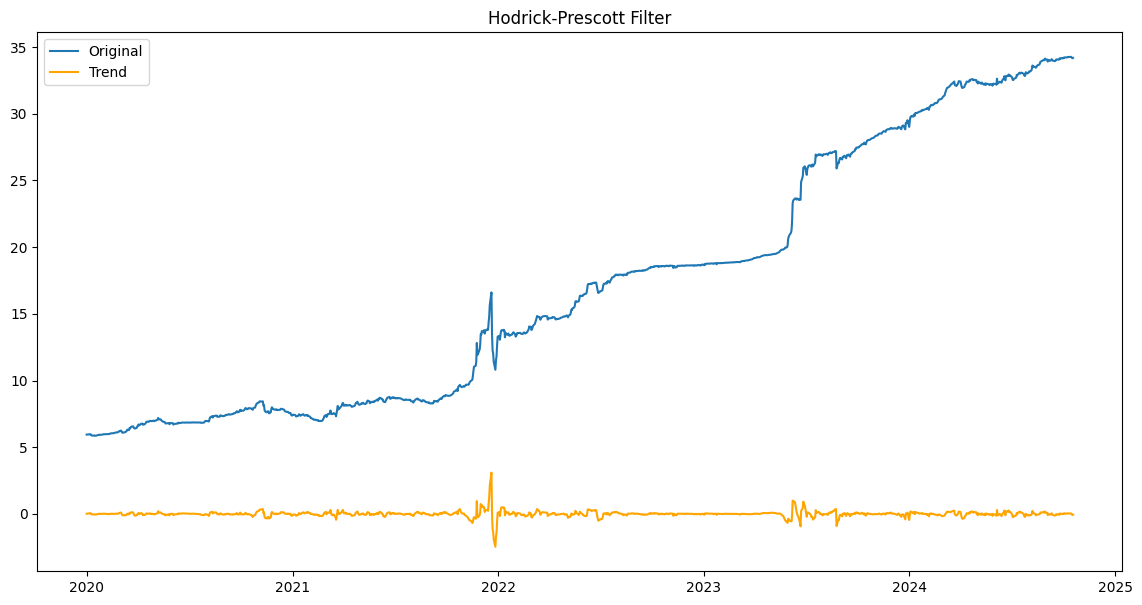

In [ ]:
df['trend'], df['cycle'] = hpfilter(df['Close'], lamb=1600)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Original')
plt.plot(df.index, df['trend'], label='Trend', color='orange')
plt.title('Hodrick-Prescott Filter')
plt.legend()
plt.show()

# **5. Save Preprocessed Data**
After completing the preprocessing steps, the cleaned and transformed dataset will be saved to a CSV file. This allows us to use the preprocessed data directly in the modeling phase without needing to repeat the preprocessing steps, ensuring consistency in future work.

In [ ]:
df_original.to_csv('USD_TRY_Raw_Data.csv')
df.to_csv('USD_TRY_Preprocessed_Data.csv')